In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the CSV file to check its contents
file_path = 'https://gist.githubusercontent.com/keerthana807/cacff6e7cbf2b23aa0c62fa156fbe910/raw/f7b8034052be94d68a4f8a70a464fac3f20b4ed7/Crop_recommendation.csv'
data = pd.read_csv(file_path)

In [3]:
# Display the first few rows of the dataframe and a summary of the data
data.info(), data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


(None,
     N   P   K  temperature   humidity        ph    rainfall label
 0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice
 1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice
 2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice
 3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice
 4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice)

In [4]:
crop_types = data['label'].unique()
crop_types.sort()
crop_types.tolist()

['apple',
 'banana',
 'blackgram',
 'chickpea',
 'coconut',
 'coffee',
 'cotton',
 'grapes',
 'jute',
 'kidneybeans',
 'lentil',
 'maize',
 'mango',
 'mothbeans',
 'mungbean',
 'muskmelon',
 'orange',
 'papaya',
 'pigeonpeas',
 'pomegranate',
 'rice',
 'watermelon']

#1. Bar Chart: Average Nutrient Requirements by Crop
Comparative Analysis of Nutrient Needs Across Different Crops

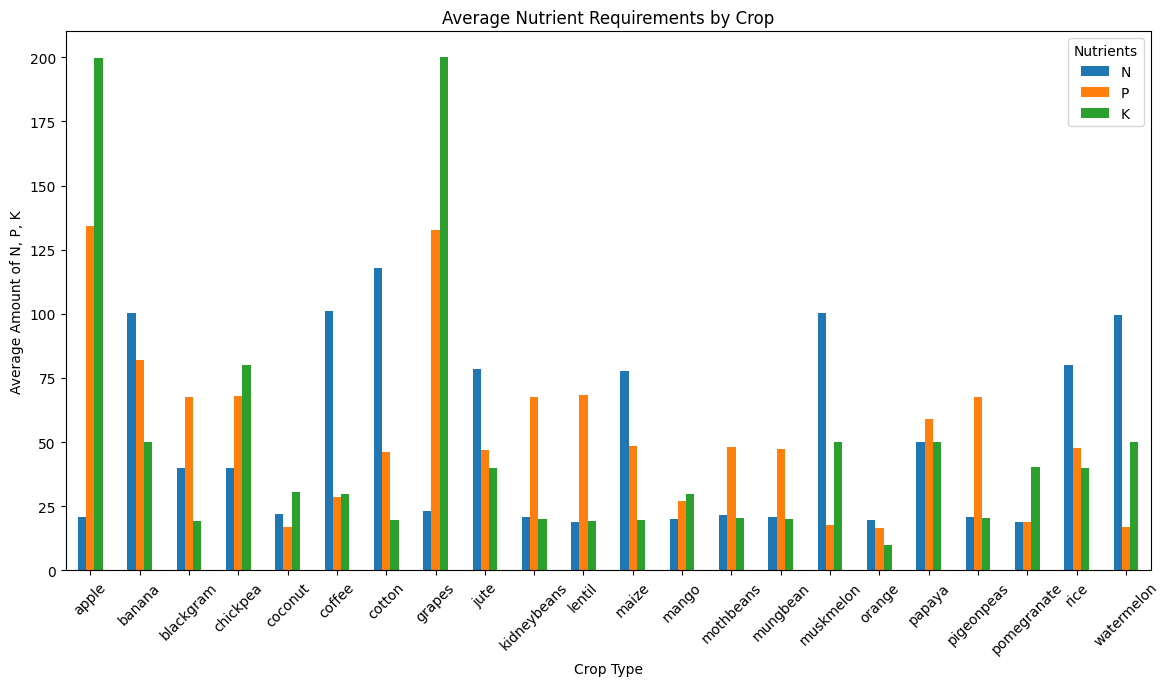

In [5]:
mean_nutrients = data.groupby('label')[['N', 'P', 'K']].mean()
mean_nutrients.plot(kind='bar', figsize=(14, 7))
plt.title('Average Nutrient Requirements by Crop')
plt.xlabel('Crop Type')
plt.ylabel('Average Amount of N, P, K')
plt.xticks(rotation=45)
plt.legend(title='Nutrients')
plt.show()


The bar chart illustrates the average requirements of Nitrogen (N), Phosphorus (P), and Potassium (K) for each crop type.
It clearly indicates that different crops have distinct nutrient profiles, suggesting the need for customized fertilization plans to optimize crop health and yield.

#2. Scatter Plot: Temperature vs Humidity for Different Crops
Climatic Preferences of Various Crops: A Temperature and Humidity Assessment

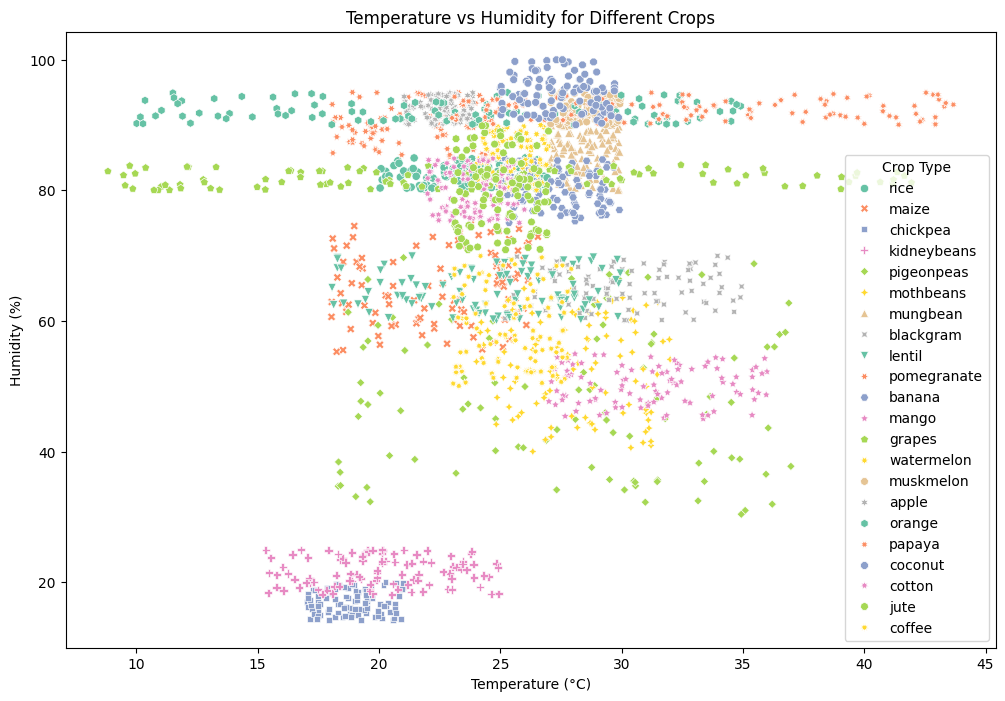

In [7]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='temperature', y='humidity', data=data, hue='label', style='label', palette='Set2')
plt.title('Temperature vs Humidity for Different Crops')
plt.xlabel('Temperature (°C)')
plt.ylabel('Humidity (%)')
plt.legend(title='Crop Type')
plt.show()


The scatter plot reveals the varying temperature and humidity conditions preferred by different crops. This visualization can help farmers understand which crops are best suited to their local climate conditions, or it may guide modifications in controlled agricultural environments.

#3. Box Plots: Distribution of Temperature, pH, and Rainfall by Crop
Environmental Condition Ranges for Crop Cultivation

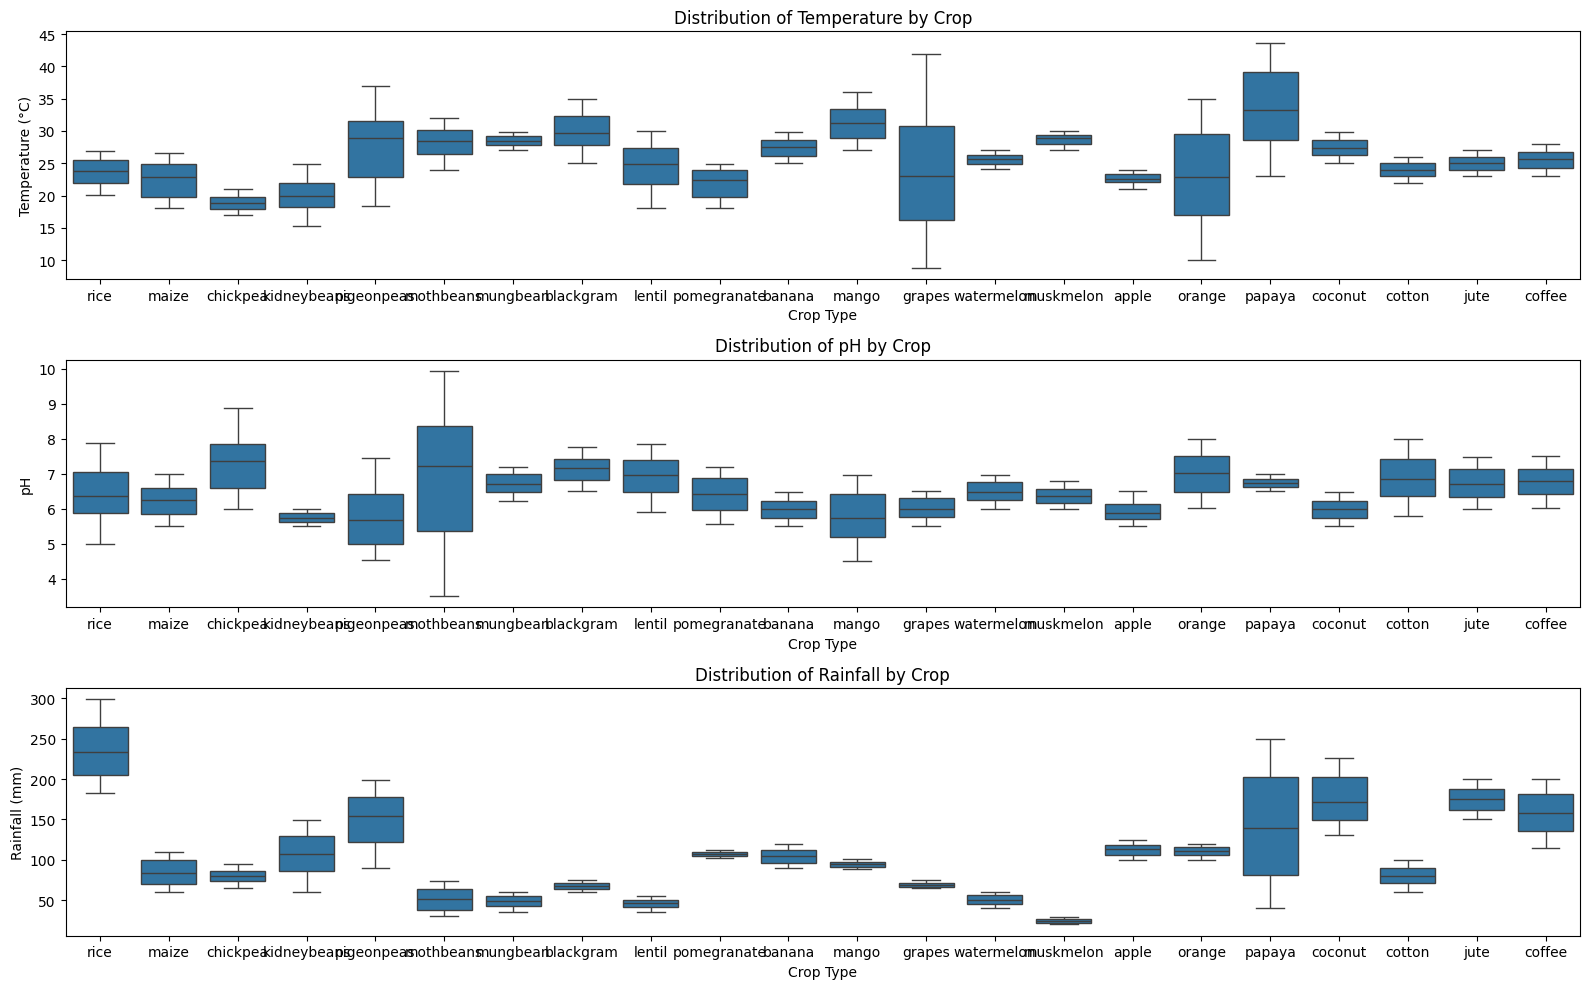

In [8]:
plt.figure(figsize=(16, 10))
plt.subplot(3, 1, 1)
sns.boxplot(x='label', y='temperature', data=data)
plt.title('Distribution of Temperature by Crop')
plt.xlabel('Crop Type')
plt.ylabel('Temperature (°C)')

plt.subplot(3, 1, 2)
sns.boxplot(x='label', y='ph', data=data)
plt.title('Distribution of pH by Crop')
plt.xlabel('Crop Type')
plt.ylabel('pH')

plt.subplot(3, 1, 3)
sns.boxplot(x='label', y='rainfall', data=data)
plt.title('Distribution of Rainfall by Crop')
plt.xlabel('Crop Type')
plt.ylabel('Rainfall (mm)')
plt.tight_layout()
plt.show()


The box plots for temperature, pH, and rainfall distributions across crops highlight the environmental tolerances and requirements of different crops. Such information is valuable for planning crop selection and ensuring that the growth conditions are within the ideal ranges for each crop type.

#4. Stacked Area Chart: Composition of Environmental Conditions by Crop

The Environmental Footprint of Crop Cultivation

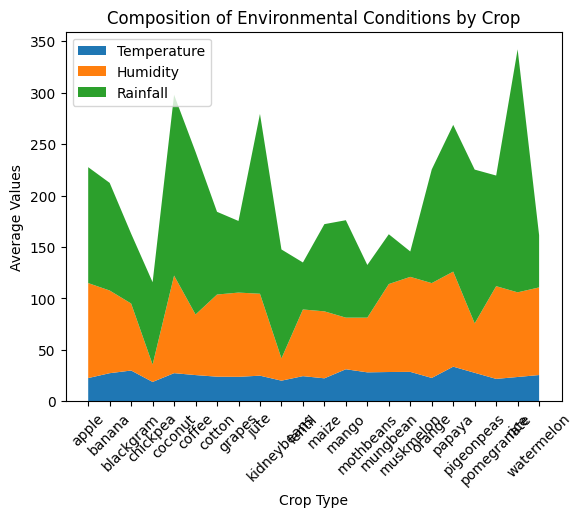

In [9]:
grouped_data = data.groupby('label').mean().reset_index()
plt.stackplot(grouped_data['label'], grouped_data['temperature'], grouped_data['humidity'], grouped_data['rainfall'], labels=['Temperature', 'Humidity', 'Rainfall'])
plt.legend(loc='upper left')
plt.title('Composition of Environmental Conditions by Crop')
plt.xlabel('Crop Type')
plt.ylabel('Average Values')
plt.xticks(rotation=45)
plt.show()


The stacked area chart combines average temperature, humidity, and rainfall for each crop type, offering a comprehensive view of the overall environmental conditions associated with different crops. This overview can aid in assessing the cumulative environmental impact of cultivating specific crops and in planning resource allocations like water supply for irrigation.

#Heatmap
To show correlations between nutrients and environmental factors.

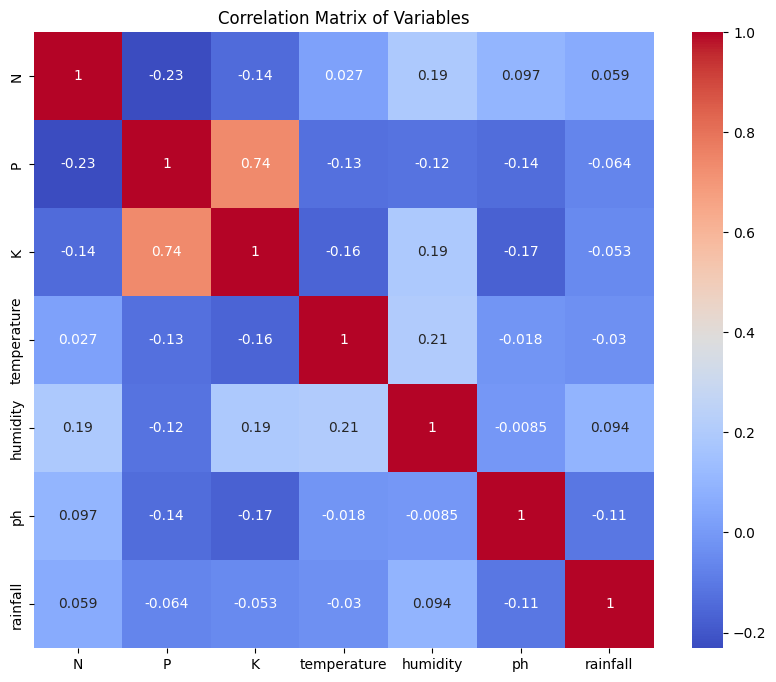

In [10]:
correlation_matrix = data[['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Variables')
plt.show()


The above heatmap showing the correlation between nutrients (N, P, K) and environmental factors (temperature, humidity, pH, and rainfall). The heatmap provides a visual representation of how these factors are interrelated, which is useful for understanding potential interactions and dependencies.

#Cluster Analysis:
The K-means clustering identified distinct groups of crops with similar nutrient and environmental requirements. This segmentation can assist in tailored agricultural practices that optimize the growing conditions for each cluster, potentially increasing yield and resource efficiency.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


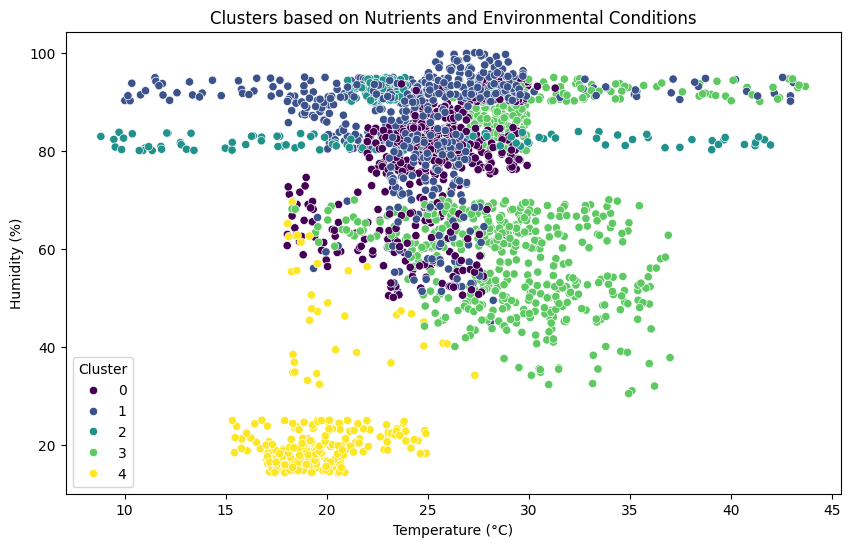

In [11]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Preparing data for clustering
features = data[['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']]
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Applying K-Means Clustering
kmeans = KMeans(n_clusters=5, random_state=0)  # Using 5 clusters arbitrarily
clusters = kmeans.fit_predict(features_scaled)

# Adding the cluster information to the original data
data['Cluster'] = clusters

# Visualizing the clusters with a scatter plot (temperature vs humidity)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='temperature', y='humidity', hue='Cluster', palette='viridis', data=data, legend='full')
plt.title('Clusters based on Nutrients and Environmental Conditions')
plt.xlabel('Temperature (°C)')
plt.ylabel('Humidity (%)')
plt.show()


The scatter plot above illustrates the result of K-means clustering on the dataset, based on nutrients and environmental conditions such as temperature and humidity. Each color represents a different cluster, showing how crops with similar nutrient and environmental profiles are grouped together.

#Temperature and Rainfall Trends Visualization
Comprehensive Climatic Trend Analysis for Agricultural Crops

The visualization comprises two plots representing the temperature and rainfall trends across a variety of agricultural crops. Each line in the plots is smoothed using a rolling mean to better visualize the overall trend.

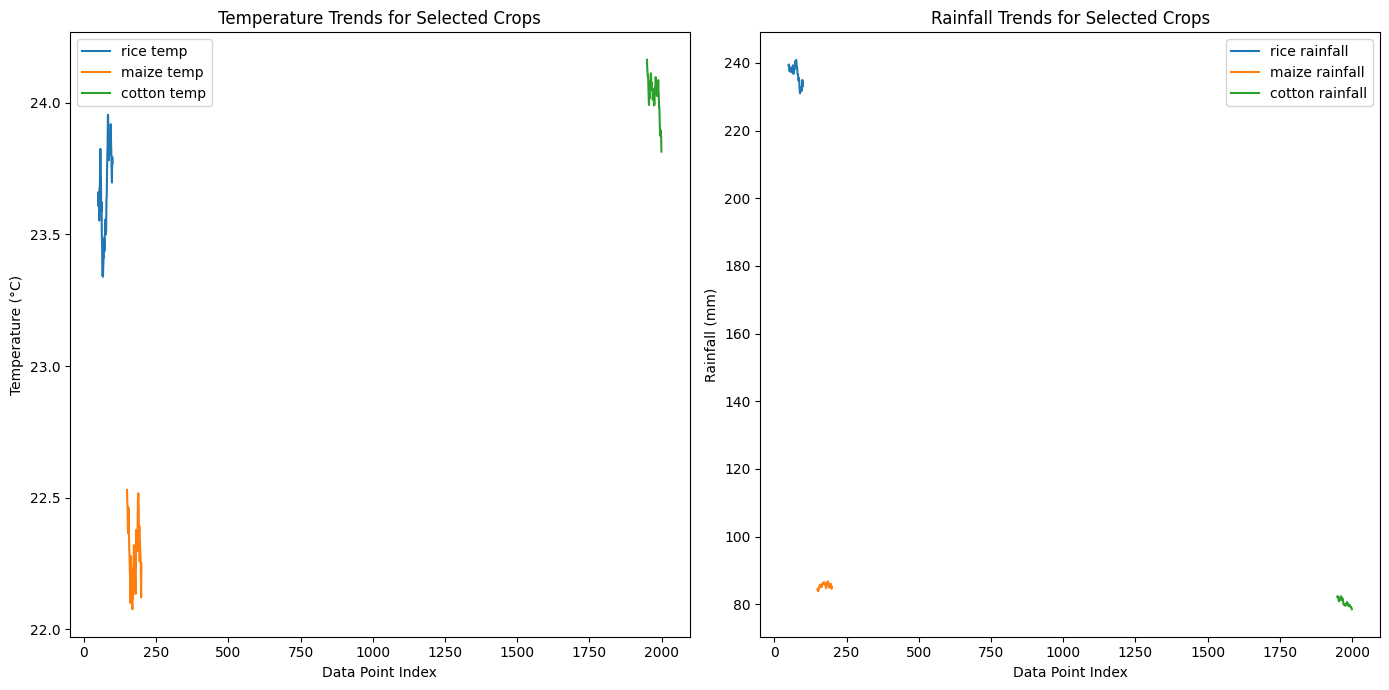

In [12]:
# Filtering data for a few select crops for clarity in visualization
selected_crops = ['rice', 'maize', 'cotton']
filtered_data = data[data['label'].isin(selected_crops)]

# Creating line plots for temperature and rainfall by crop type
plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
for crop in selected_crops:
    subset = filtered_data[filtered_data['label'] == crop]
    plt.plot(subset['temperature'].rolling(window=50).mean(), label=f'{crop} temp')
plt.title('Temperature Trends for Selected Crops')
plt.xlabel('Data Point Index')
plt.ylabel('Temperature (°C)')
plt.legend()

plt.subplot(1, 2, 2)
for crop in selected_crops:
    subset = filtered_data[filtered_data['label'] == crop]
    plt.plot(subset['rainfall'].rolling(window=50).mean(), label=f'{crop} rainfall')
plt.title('Rainfall Trends for Selected Crops')
plt.xlabel('Data Point Index')
plt.ylabel('Rainfall (mm)')
plt.legend()

plt.tight_layout()
plt.show()


Here are the line graphs showing temperature and rainfall trends for selected crops (rice, maize, and cotton).

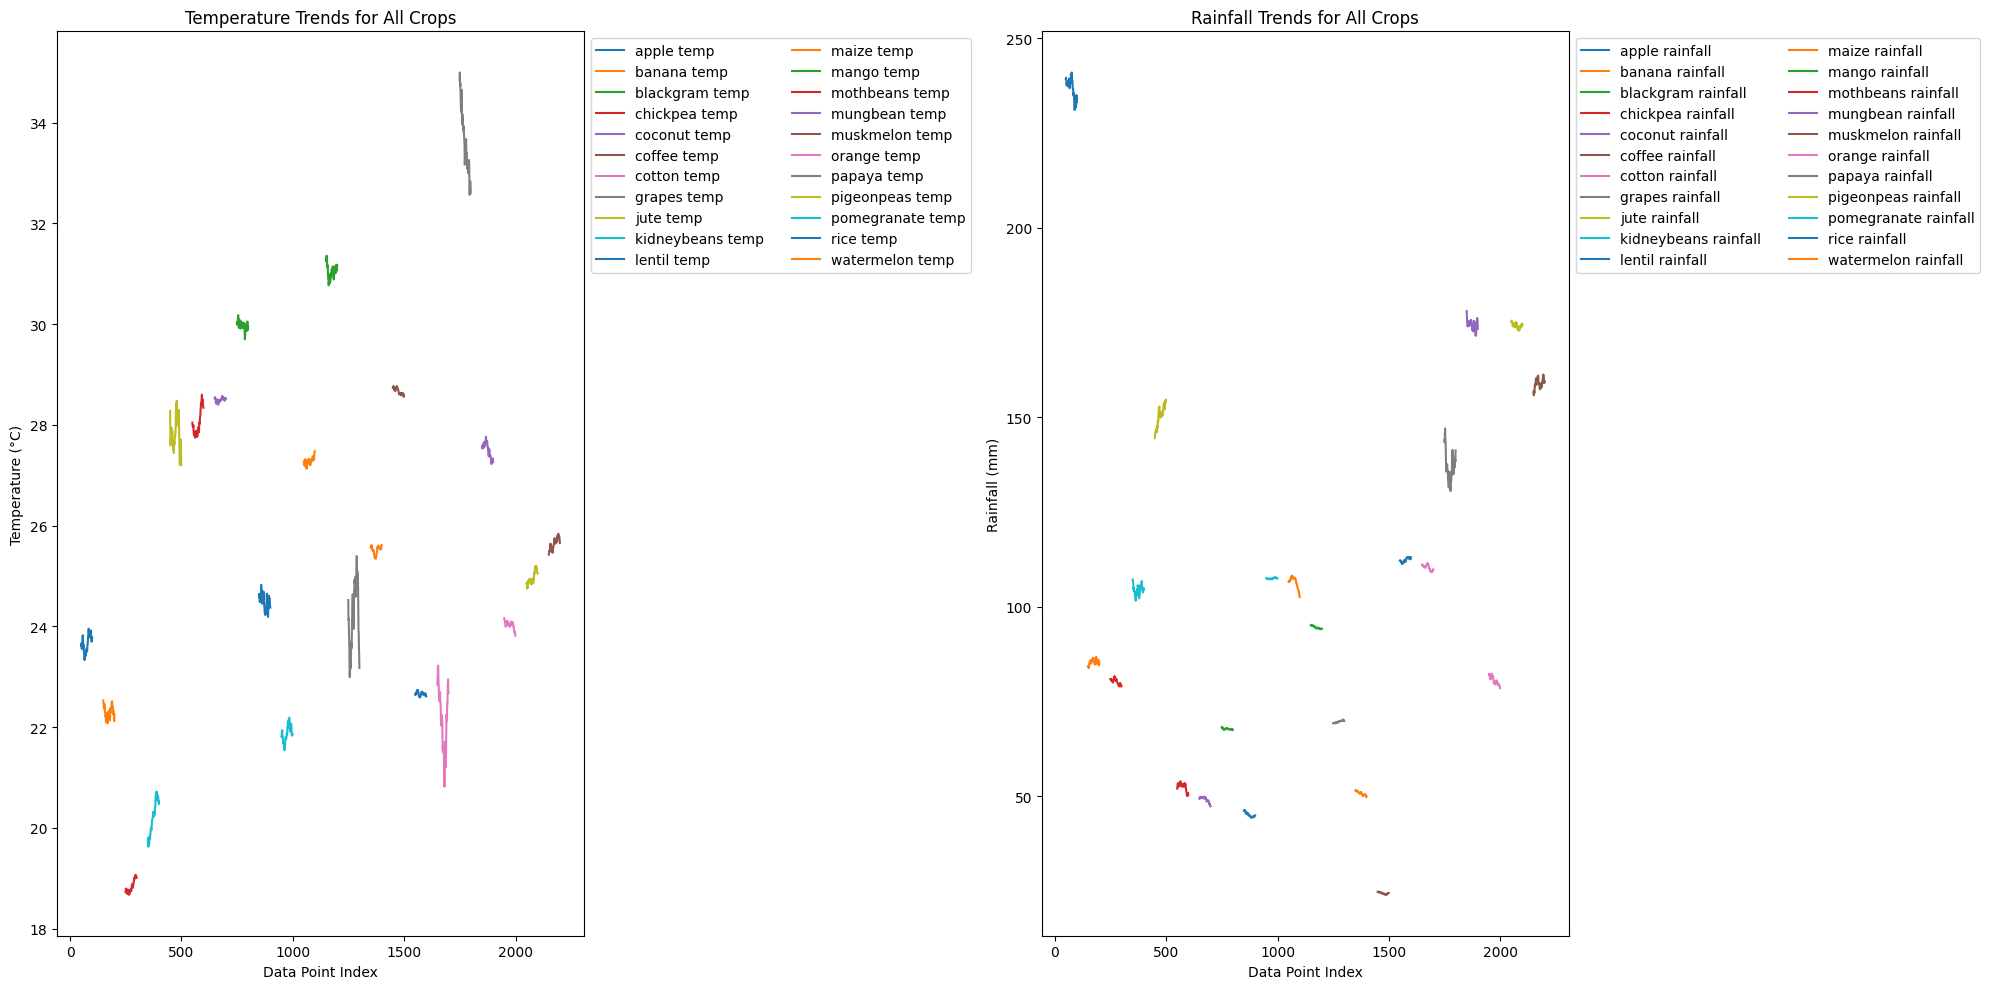

In [ ]:
# Filtering data for all crops this time
all_crops = crop_types.tolist()
filtered_data_all = data[data['label'].isin(all_crops)]

# Creating line plots for temperature and rainfall by all crop types
plt.figure(figsize=(20, 10))

# Temperature trends for all crops
plt.subplot(1, 2, 1)
for crop in all_crops:
    subset = filtered_data_all[filtered_data_all['label'] == crop]
    plt.plot(subset['temperature'].rolling(window=50).mean(), label=f'{crop} temp')

plt.title('Temperature Trends for All Crops')
plt.xlabel('Data Point Index')
plt.ylabel('Temperature (°C)')
plt.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=2)

# Rainfall trends for all crops
plt.subplot(1, 2, 2)
for crop in all_crops:
    subset = filtered_data_all[filtered_data_all['label'] == crop]
    plt.plot(subset['rainfall'].rolling(window=50).mean(), label=f'{crop} rainfall')

plt.title('Rainfall Trends for All Crops')
plt.xlabel('Data Point Index')
plt.ylabel('Rainfall (mm)')
plt.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=2)

plt.tight_layout()
plt.show()


The line plots are now displaying temperature and rainfall trends for all the crops in the dataset. With the data from all crop types included, we get a comprehensive picture that shows:

**Temperature Trends for All Crops (Left Plot**): The variation in temperature conditions each crop experiences. Crops like apples and grapes appear to have data points across a broad range of temperatures, indicating versatility or data from multiple growing regions.

**Rainfall Trends for All Crops (Right Plot)**: The rainfall patterns associated with each crop type. Some crops, like rice, seem to have data points that represent higher rainfall, which aligns with the crop's need for wetter conditions.

#Overall Conclusions

**Customization is Key:** Each crop has unique needs, and an agricultural approach that customizes practices to these needs is likely to be more successful.

**Environmental Matchmaking:** Selecting crops that match the local environment's offerings can lead to fewer interventions and better crop performance.

**Data-Driven Decisions:** Leveraging data analytics in agriculture can lead to more informed decision-making, resource efficiency, and sustainability.

These insights collectively support the move towards data-driven agriculture, where decisions are informed by comprehensive analysis of environmental, nutritional, and climatic data to ensure optimal crop performance and sustainable practices